In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
THERESA_MAY_COLOR = '#b7c631'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
LEOMESSI_COLOR = '#e8d2d0'

CRISTIANO_RONALDO = 'cristiano'
CRISTIANO_RONALDO_COLOR = '#bec6c0'

RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

# sport clubs
REAL_MADRID = 'realmadrid'
FC_BARCELONA = 'fcbarcelona'


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, FLOTUS, CNN, FOXNEWS, BBC, LEOMESSI, CRISTIANO_RONALDO,RAFAEL_NADAL ]

# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/koosha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/koosha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df_clustered = pd.read_csv('clustered_data_new.csv')
print(df_clustered.shape[0])

3832


In [4]:
df_clustered.head()

Unnamed: 0  username  name       bio  photo  nfollower  nfollowee  \
0           0  0.303216   0.0  0.000000      0   0.000022   0.052744   
1           1  0.000000   0.0  0.379978      0   0.002047   0.181007   
2           2  0.000000   0.0  0.407353      0   0.000332   0.131993   
3           3  0.000000   0.0  0.482680      0   0.000162   0.079382   
4           4  0.000000   0.0  0.303216      0   0.000061   0.055940   

   nmediacount  follower  followee  \
0     0.006037       170       396   
1     0.013694     15659      1359   
2     0.015847      2539       991   
3     0.011386      1240       596   
4     0.003862       468       420   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                  comment_created_at  \
0                                                 --   
1                                                 --   
2                                                 --   
3  2018-11-29 19:31:24,,,2018-11-29 19:32:55,,,20...   
4                                                 --   

                                          comment_id  \
0                                                 --   
1                                                 --   
2                                                 --   
3  17931832384236216,,,17996948788073749,,,179064...   
4                                                 --   

                    comment_post_shortcode  \
0                                       --   
1                                       --   
2                                       --   
3  BqxGs_YF-Ph,,,BqxGs_YF-Ph,,,BqxGs_YF-Ph   
4                                       --   

                          comment_shortcode_username  \
0                                                 --   
1                                                 --   
2                                                 --   
3  realdonaldtrump,,,realdonaldtrump,,,realdonald...   
4                                                 --   

                                        comment_text  comment_total  \
0                                                 --              0   
1                                                 --              0   
2                                                 --              0   
3  ❤️,,,@ajmal_hakkim_ if you had proper grammar ...              3   
4                                                 --              0   

  like_total                            like_shortcode_username  \
0          0                                            foxnews   
1          0                                            reuters   
2          0  emmanuelmacron,,,emmanuelmacron,,,emmanuelmacr...   
3          1                                    realdonaldtrump   
4          0                                            reuters   

                                 like_post_shortcode  \
0                                        Bqx7XNahvfY   
1                                        Br8XsKaFUIc   
2  BqUv1eonVJQ,,,BqUrbhqHY9X,,,BqNGePuFrq0,,,BqDc...   
3                                        Bpe4fLZApVQ   
4                                        Br-5eUAlbwA   

                                             like_id  
0                           5c45d2950c2acb018cef1933  
1                           5cb4d9b4b5d85c11bf444a63  
2  5c13dbc30c2acb135537daec,,,5c13e8eb0c2acb13553...  
3                           5be46d700c2acb7ef4464bb7  
4                           5cb4d8b9b5d85c11bf44353a  

[5 rows x 40 columns]

# spectral 3

In [5]:
class_method = 'class spectral 3'
df_grouped = df_clustered.groupby(class_method)
groups = df_grouped.groups
groups.keys()

dict_keys([0, 1, 2])

In [6]:
grouped_0 = df_grouped.get_group(0)
grouped_1 = df_grouped.get_group(1)
grouped_2 = df_grouped.get_group(2)
# grouped_3 = df_grouped.get_group(3)

In [7]:
grouped_0.head()

Unnamed: 0  username      name       bio  photo  nfollower  nfollowee  \
0           0  0.303216  0.000000  0.000000      0   0.000022   0.052744   
3           3  0.000000  0.000000  0.482680      0   0.000162   0.079382   
4           4  0.000000  0.000000  0.303216      0   0.000061   0.055940   
5           5  0.449436  0.260556  0.000000      0   0.000008   0.016516   
7           7  0.000000  0.000000  0.318784      0   0.000023   0.141050   

   nmediacount  follower  followee            ...             \
0     0.006037       170       396            ...              
3     0.011386      1240       596            ...              
4     0.003862       468       420            ...              
5     0.001465        58       124            ...              
7     0.000866       178      1059            ...              

                                  comment_created_at  \
0                                                 --   
3  2018-11-29 19:31:24,,,2018-11-29 19:32:55,,,20...   
4                                                 --   
5                                                 --   
7                                                 --   

                                          comment_id  \
0                                                 --   
3  17931832384236216,,,17996948788073749,,,179064...   
4                                                 --   
5                                                 --   
7                                                 --   

                    comment_post_shortcode  \
0                                       --   
3  BqxGs_YF-Ph,,,BqxGs_YF-Ph,,,BqxGs_YF-Ph   
4                                       --   
5                                       --   
7                                       --   

                          comment_shortcode_username  \
0                                                 --   
3  realdonaldtrump,,,realdonaldtrump,,,realdonald...   
4                                                 --   
5                                                 --   
7                                                 --   

                                        comment_text  comment_total  \
0                                                 --              0   
3  ❤️,,,@ajmal_hakkim_ if you had proper grammar ...              3   
4                                                 --              0   
5                                                 --              0   
7                                                 --              0   

  like_total  like_shortcode_username  like_post_shortcode  \
0          0                  foxnews          Bqx7XNahvfY   
3          1          realdonaldtrump          Bpe4fLZApVQ   
4          0                  reuters          Br-5eUAlbwA   
5          0              rafaelnadal          BqmqbmCAn_q   
7          0              rafaelnadal          BqpsJ_zgPMY   

                    like_id  
0  5c45d2950c2acb018cef1933  
3  5be46d700c2acb7ef4464bb7  
4  5cb4d8b9b5d85c11bf44353a  
5  5c672f57b5d85c3e0ad9e6e6  
7  5c66ef14b5d85c3ba634a7dc  

[5 rows x 40 columns]

In [8]:
df_grouped_described = df_clustered.groupby(class_method).describe()
df_grouped_described

Unnamed: 0                                                   \
                      count         mean          std   min      25%     50%   
class spectral 3                                                               
0                    1278.0  1704.493740  1116.118557   0.0   665.75  1620.0   
1                    1704.0  2014.889671  1117.616086   1.0  1032.25  2059.5   
2                     850.0  2033.507059  1021.354474  14.0  1313.25  1954.5   

                                      bio           ...   username       \
                      75%     max   count      mean ...        75%  max   
class spectral 3                                    ...                   
0                 2686.50  3826.0  1278.0  0.297921 ...   0.000000  1.0   
1                 2993.25  3831.0  1704.0  0.284552 ...   0.303216  1.0   
2                 2957.75  3828.0   850.0  0.118347 ...   0.449436  1.0   

                 verified                                               
                    count      mean       std  min  25%  50%  75%  max  
class spectral 3                                                        
0                  1278.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
1                  1704.0  0.001761  0.041934  0.0  0.0  0.0  0.0  1.0  
2                   850.0  0.001176  0.034300  0.0  0.0  0.0  0.0  1.0  

[3 rows x 184 columns]

In [9]:
df_grouped_described[['follower', 'nfollower']]

follower                                                   \
                    count          mean            std  min     25%    50%   
class spectral 3                                                             
0                  1278.0    565.432707    1453.103557  0.0  115.25  271.0   
1                  1704.0   9042.698944  190113.421635  0.0  108.00  354.5   
2                   850.0  17613.141176  251917.718999  0.0   47.25  129.0   

                                     nfollower                           \
                      75%        max     count      mean       std  min   
class spectral 3                                                          
0                  562.75    30620.0    1278.0  0.000074  0.000190  0.0   
1                 1105.50  7650215.0    1704.0  0.001182  0.024851  0.0   
2                  928.00  7228344.0     850.0  0.002302  0.032929  0.0   

                                                          
                       25%       50%       75%       max  
class spectral 3                                          
0                 0.000015  0.000035  0.000074  0.004003  
1                 0.000014  0.000046  0.000145  1.000000  
2                 0.000006  0.000017  0.000121  0.944855

In [10]:
df_grouped_described[['followee', 'nfollowee']]

followee                                               \
                    count        mean          std  min     25%    50%   
class spectral 3                                                         
0                  1278.0  620.554773   978.783326  0.0  135.00  342.5   
1                  1704.0  734.203052  1359.650593  0.0   89.75  264.0   
2                   850.0  540.040000  1195.684535  0.0   29.00  106.5   

                                 nfollowee                                     \
                     75%     max     count      mean       std  min       25%   
class spectral 3                                                                
0                 661.75  7501.0    1278.0  0.082652  0.130365  0.0  0.017981   
1                 679.50  7508.0    1704.0  0.097789  0.181094  0.0  0.011954   
2                 377.00  7503.0     850.0  0.071929  0.159255  0.0  0.003863   

                                                
                       50%       75%       max  
class spectral 3                                
0                 0.045618  0.088139  0.999068  
1                 0.035162  0.090503  1.000000  
2                 0.014185  0.050213  0.999334

In [11]:
df_grouped_described[['mediacount', 'nmediacount']]

mediacount                                                   \
                      count        mean          std  min  25%   50%     75%   
class spectral 3                                                               
0                    1278.0   78.402973   199.868632  0.0  5.0  17.0   59.75   
1                    1704.0  170.185446  1191.150830  0.0  6.0  23.0   89.00   
2                     850.0  194.975294   629.043202  0.0  5.0  22.0  107.00   

                          nmediacount                                     \
                      max       count      mean       std  min       25%   
class spectral 3                                                           
0                  2968.0      1278.0  0.001740  0.004436  0.0  0.000111   
1                 45057.0      1704.0  0.003777  0.026437  0.0  0.000133   
2                  8901.0       850.0  0.004327  0.013961  0.0  0.000111   

                                                
                       50%       75%       max  
class spectral 3                                
0                 0.000377  0.001326  0.065872  
1                 0.000510  0.001975  1.000000  
2                 0.000488  0.002375  0.197550

In [12]:
df_grouped_described['username']

count      mean       std  min  25%       50%       75%  \
class spectral 3                                                             
0                 1278.0  0.084575  0.165405  0.0  0.0  0.000000  0.000000   
1                 1704.0  0.114944  0.176909  0.0  0.0  0.000000  0.303216   
2                  850.0  0.268532  0.271538  0.0  0.0  0.260556  0.449436   

                  max  
class spectral 3       
0                 1.0  
1                 1.0  
2                 1.0

In [13]:
df_grouped_described['bio']

count      mean       std  min  25%       50%       75%  \
class spectral 3                                                             
0                 1278.0  0.297921  0.232788  0.0  0.0  0.335176  0.411154   
1                 1704.0  0.284552  0.234511  0.0  0.0  0.317998  0.410363   
2                  850.0  0.118347  0.184994  0.0  0.0  0.000000  0.194314   

                  max  
class spectral 3       
0                 1.0  
1                 1.0  
2                 1.0

In [14]:
df_grouped_described['name']

count      mean       std  min       25%       50%  \
class spectral 3                                                        
0                 1278.0  0.121763  0.230742  0.0  0.000000  0.000000   
1                 1704.0  0.106936  0.165468  0.0  0.000000  0.000000   
2                  850.0  0.630931  0.331306  0.0  0.449436  0.579739   

                       75%       max  
class spectral 3                      
0                 0.220288  1.000000  
1                 0.303216  0.709297  
2                 1.000000  1.000000

In [15]:
df_grouped_described['photo']

count      mean       std  min  25%  50%  75%  max
class spectral 3                                                     
0                 1278.0  0.019562  0.138543  0.0  0.0  0.0  0.0  1.0
1                 1704.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2                  850.0  0.432941  0.495774  0.0  0.0  0.0  1.0  1.0

In [16]:
df_grouped_described['private']

count      mean       std  min  25%  50%  75%  max
class spectral 3                                                     
0                 1278.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
1                 1704.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2                  850.0  0.054118  0.226383  0.0  0.0  0.0  0.0  1.0

In [17]:
df_grouped_described['verified']

count      mean       std  min  25%  50%  75%  max
class spectral 3                                                     
0                 1278.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1                 1704.0  0.001761  0.041934  0.0  0.0  0.0  0.0  1.0
2                  850.0  0.001176  0.034300  0.0  0.0  0.0  0.0  1.0

In [18]:
df_grouped_described['mcm']

count      mean       std  min  25%  50%  75%  max
class spectral 3                                                     
0                 1278.0  1.230829  0.483806  1.0  1.0  1.0  1.0  3.0
1                 1704.0  1.373239  0.628460  1.0  1.0  1.0  2.0  3.0
2                  850.0  2.291765  0.910379  1.0  2.0  2.0  3.0  4.0

In [19]:
df_grouped_described['lcm']

count  mean  std  min  25%  50%  75%  max
class spectral 3                                            
0                 1278.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
1                 1704.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
2                  850.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [20]:
grouped_0.head()

Unnamed: 0  username      name       bio  photo  nfollower  nfollowee  \
0           0  0.303216  0.000000  0.000000      0   0.000022   0.052744   
3           3  0.000000  0.000000  0.482680      0   0.000162   0.079382   
4           4  0.000000  0.000000  0.303216      0   0.000061   0.055940   
5           5  0.449436  0.260556  0.000000      0   0.000008   0.016516   
7           7  0.000000  0.000000  0.318784      0   0.000023   0.141050   

   nmediacount  follower  followee            ...             \
0     0.006037       170       396            ...              
3     0.011386      1240       596            ...              
4     0.003862       468       420            ...              
5     0.001465        58       124            ...              
7     0.000866       178      1059            ...              

                                  comment_created_at  \
0                                                 --   
3  2018-11-29 19:31:24,,,2018-11-29 19:32:55,,,20...   
4                                                 --   
5                                                 --   
7                                                 --   

                                          comment_id  \
0                                                 --   
3  17931832384236216,,,17996948788073749,,,179064...   
4                                                 --   
5                                                 --   
7                                                 --   

                    comment_post_shortcode  \
0                                       --   
3  BqxGs_YF-Ph,,,BqxGs_YF-Ph,,,BqxGs_YF-Ph   
4                                       --   
5                                       --   
7                                       --   

                          comment_shortcode_username  \
0                                                 --   
3  realdonaldtrump,,,realdonaldtrump,,,realdonald...   
4                                                 --   
5                                                 --   
7                                                 --   

                                        comment_text  comment_total  \
0                                                 --              0   
3  ❤️,,,@ajmal_hakkim_ if you had proper grammar ...              3   
4                                                 --              0   
5                                                 --              0   
7                                                 --              0   

  like_total  like_shortcode_username  like_post_shortcode  \
0          0                  foxnews          Bqx7XNahvfY   
3          1          realdonaldtrump          Bpe4fLZApVQ   
4          0                  reuters          Br-5eUAlbwA   
5          0              rafaelnadal          BqmqbmCAn_q   
7          0              rafaelnadal          BqpsJ_zgPMY   

                    like_id  
0  5c45d2950c2acb018cef1933  
3  5be46d700c2acb7ef4464bb7  
4  5cb4d8b9b5d85c11bf44353a  
5  5c672f57b5d85c3e0ad9e6e6  
7  5c66ef14b5d85c3ba634a7dc  

[5 rows x 40 columns]

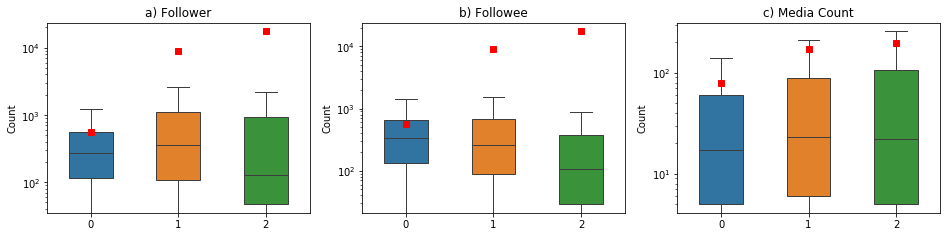

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,3.5))

s1 = grouped_0['follower']
s1.name = '0'
s2 = grouped_1['follower']
s2.name = '1'
s3 = grouped_2['follower']
s3.name = '2'
data3 = pd.concat([s1, s2, s3], axis=1)
boxplot7 = sns.boxplot( data=data3, showfliers=False, width=0.5,  linewidth=1, ax=ax1)#, showmeans=True)
boxplot7.plot(data3.mean(), 'rs')
boxplot7.set_yscale('log')
boxplot7.set_ylabel("Count")
boxplot7.set_title("a) Follower")

s1 = grouped_0['followee']
s1.name = '0'
s2 = grouped_1['followee']
s2.name = '1'
s3 = grouped_2['followee']
s3.name = '2'
data2 = pd.concat([s1, s2, s3], axis=1)
boxplot2 = sns.boxplot( data=data2, showfliers=False, width=0.5,  linewidth=1, ax=ax2)#, showmeans=True)
boxplot2.plot(data3.mean(), 'rs')
boxplot2.set_yscale('log')
boxplot2.set_ylabel("Count")
boxplot2.set_title("b) Followee")


s1 = grouped_0['mediacount']
s1.name = '0'
s2 = grouped_1['mediacount']
s2.name = '1'
s3 = grouped_2['mediacount']
s3.name = '2'
data3 = pd.concat([s1, s2, s3], axis=1)
boxplot3 = sns.boxplot( data=data3, showfliers=False, width=0.5,  linewidth=1, ax=ax3)#, showmeans=True)
boxplot3.plot(data3.mean(), 'rs')
boxplot3.set_yscale('log')
boxplot3.set_ylabel("Count")
boxplot3.set_title("c) Media Count")

plt.show()




Text(0.5,0,'Follower')

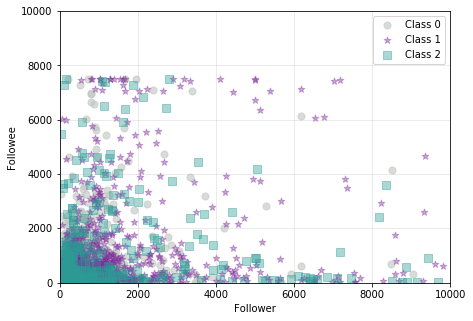

In [22]:

fig, (ax1) = plt.subplots(1,1, figsize=(7,5))

ax = grouped_0.plot.scatter(x='follower', y='followee', ax=ax1, c='#bec6c0', alpha=0.6, logy=False, logx=False, grid=True, s=50,  marker="o", legend=True, label='Class 0')

ax = grouped_1.plot.scatter(x='follower', y='followee', ax=ax1, c='#7f2d9b', alpha=0.4, logy=False, logx=False, grid=True, s=50,  marker='*', legend=True, label='Class 1')

ax = grouped_2.plot.scatter(x='follower', y='followee', ax=ax1, c='#2c9b95', alpha=0.4, logy=False, logx=False, grid=True, s=50,  marker='s', legend=True, label='Class 2')

# ax = grouped_3.plot.scatter(x='follower', y='followee', ax=ax1, c='#446fc4', alpha=0.5, logy=True, logx=False, grid=True, s=50,  marker='v', legend=True, label='Class 3')


ax.axes.set_xlim([-10,10000])
ax.axes.set_ylim([-10,10000])

ax.grid(True, which='both', linestyle='-', alpha=0.3)

ax.set_ylabel("Followee")
ax.set_xlabel("Follower")

